In [47]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import pandas as pd
import numpy as np

In [32]:
data2=pd.read_csv(filepath_or_buffer='time_series/data/data2.csv',names=['value'])

In [22]:
#data2=data2.reset_index()

In [33]:
data2.head(10)

,value
0,1455.219971
1,1399.420044
2,1402.109985
3,1403.449951
4,1441.469971
5,1457.599976
6,1438.560059
7,1432.250000
8,1449.680054
9,1465.150024


In [34]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data2)

In [38]:
scaled_data

array([[0.51964627],
       [0.48240909],
       [0.48420417],
       ...,
       [0.99668337],
       [0.99904576],
       [0.99720391]])

In [40]:
train_length=int(len(scaled_data)*0.75)
train = scaled_data[0:train_length,:]
valid = scaled_data[train_length:,:]

In [41]:
train

array([[0.51964627],
       [0.48240909],
       [0.48420417],
       ...,
       [0.40638637],
       [0.42615948],
       [0.42606604]])

In [82]:
x_train, y_train = [], []

In [83]:
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])

In [84]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [87]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


(3068, 60, 1)

In [88]:
x_train.shape


(3068, 60, 1)

In [51]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.


In [52]:
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Instructions for updating:
Use tf.cast instead.


Epoch 1/1


 - 115s - loss: 7.7381e-04


In [172]:
x_valid=[]
for i in range(len(valid)):
    x_valid.append(scaled_data[(i-60+train_length):(i+train_length),0])


(1043, 60)

In [173]:
x_valid=np.array(x_valid)


(1043, 60)

In [174]:
x_valid.shape


(1043, 60)

In [175]:
x_valid=np.reshape(x_valid, (x_valid.shape[0],x_valid.shape[1],1))

In [176]:
y_valid= model.predict(x_valid)

In [177]:
rms=np.sqrt(np.mean(np.power((valid-y_valid),2)))

In [178]:
rms

0.013552832189854768

In [146]:
scaled_data[0]

array([0.51964627])

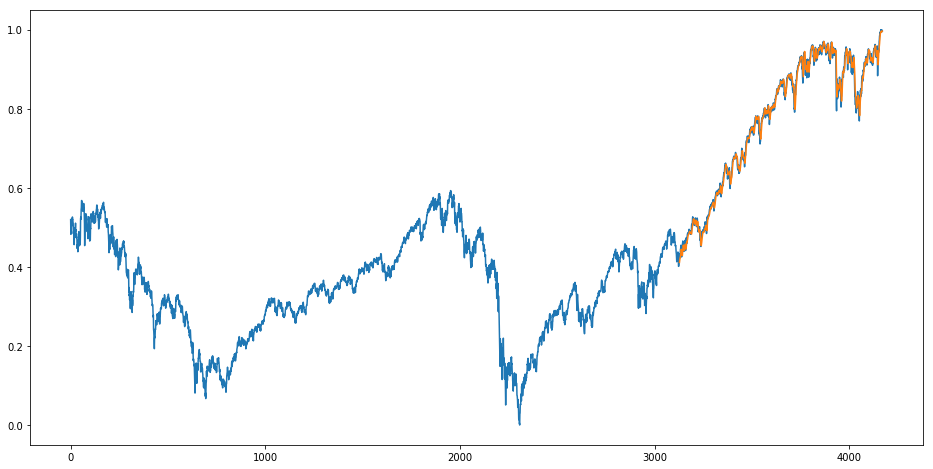

In [179]:
final={}
final['valid']=[i[0] for i in scaled_data]
final['prediction']=[None for i in range(train_length)]+[y[0] for y in y_valid]

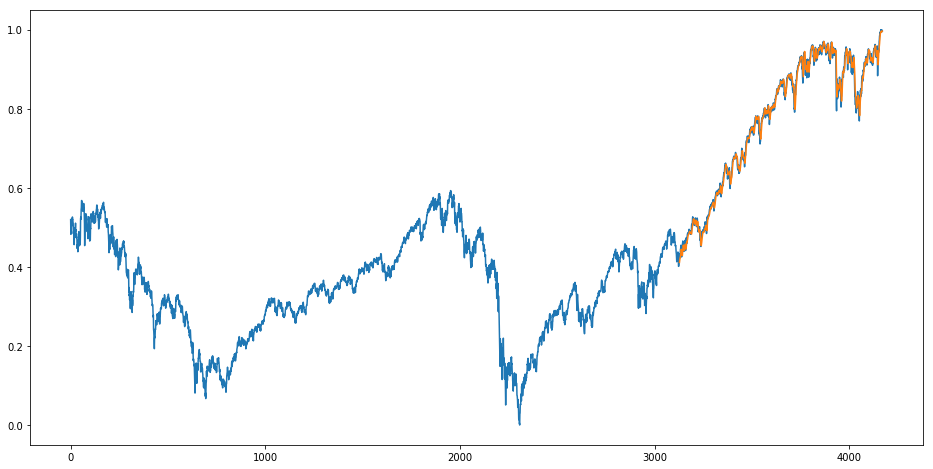

In [180]:
final=pd.DataFrame(final)


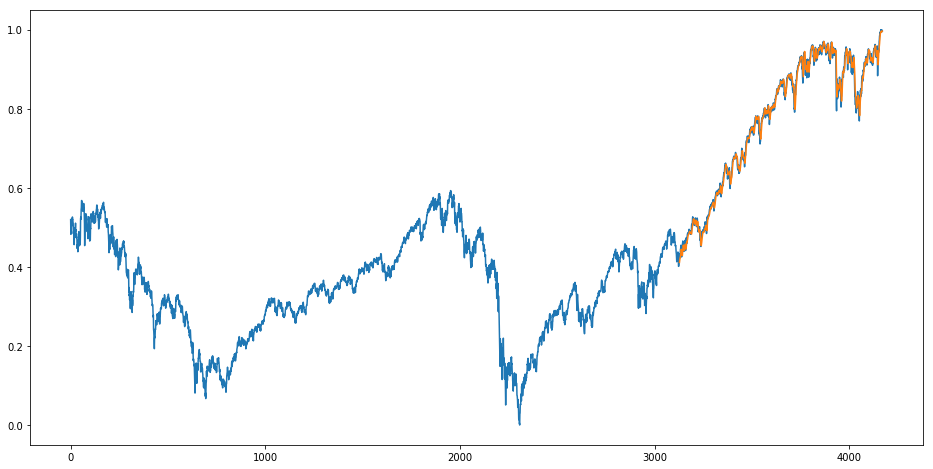

In [183]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

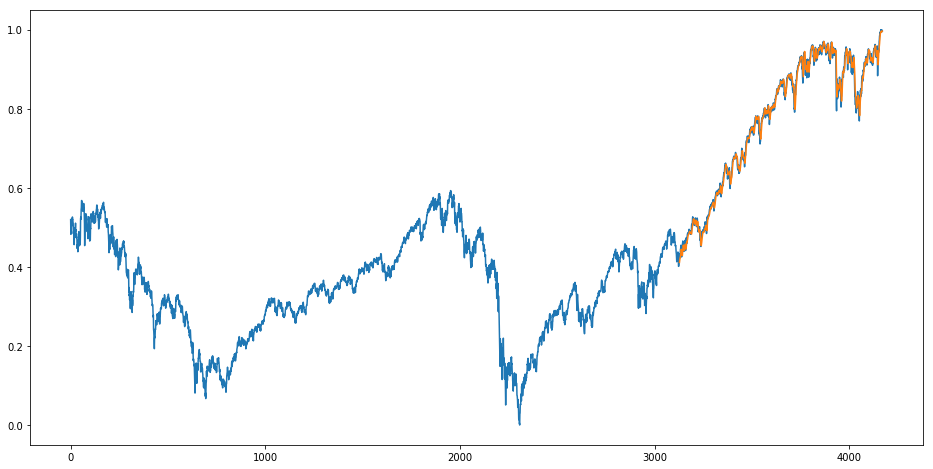

In [186]:

plt.figure(figsize=(16,8))
plt.plot(final[['valid','prediction']])

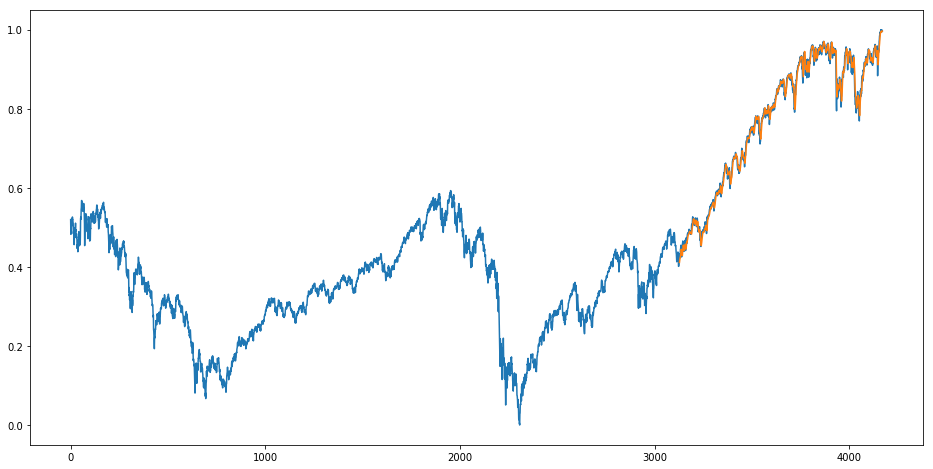

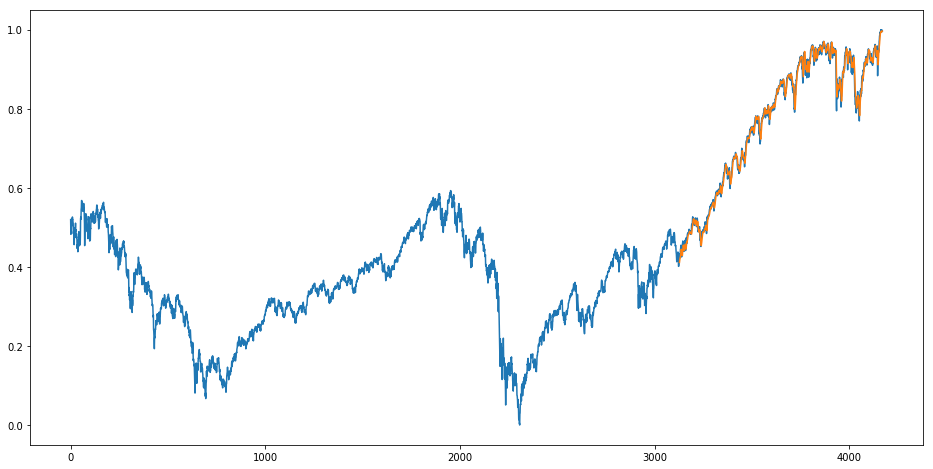

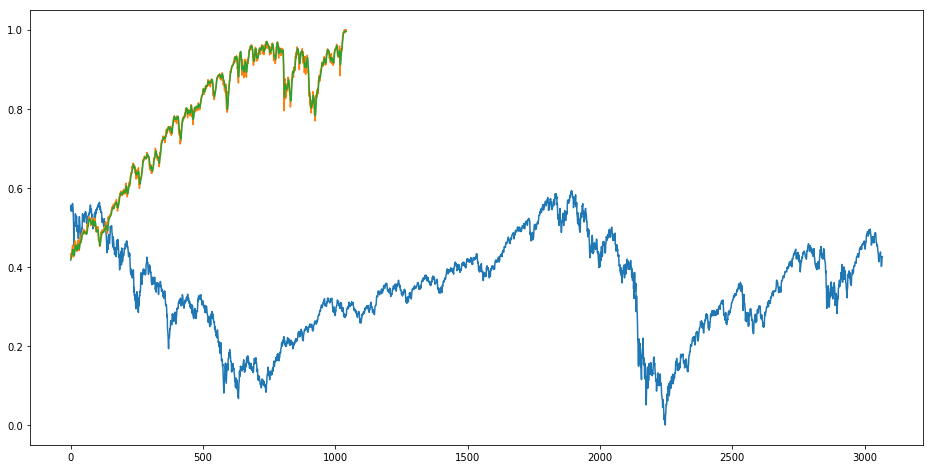